# Importing the Libraries and Dataset

Importing required libraries and give them alias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The Boston Housing Price dataset aims to predict the median value of owner-occupied homes (in thousands of dollars) based on various features or attributes related to the neighborhoods in the Boston area. It serves as a regression problem, where the goal is to build a predictive model that can estimate house prices based on the given input features.

In [2]:
#loading the .csv (comma seperated values) file with pandas
Housing = pd.read_csv(r'C:\Users\sweet\OneDrive\Documents\DS\dataset\Boston house Price\housing.csv')
Housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# Analysis the datatypes of each feature
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
# Checking for missing values
Housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
# Statistical analyzing 
Housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Declaring the Variables

In [6]:
X = Housing.iloc[:,:-1]       # Independent variable
y = Housing['MEDV']           # Dependent variable

In [7]:
X,y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
 0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
 1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
 2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
 3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
 4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
 501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
 502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
 503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
 504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
 505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       17.8  39

# Splitting the Dataset into Train and Test Dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Training the Model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
mse = cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5) # Negative Mean Squared error
mse

array([-33.75185215, -21.4641199 , -27.97099777, -17.7140812 ,
       -25.03832267])

The Mean Squared Error measures how close a regression line is to a set of data points.Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.

In [10]:
Mean_mse = np.mean(mse)
print(Mean_mse)

-25.187874739284904


# Fitting the Model

In [11]:
reg.fit(X_train,y_train)

LinearRegression()

# Prediction

In [12]:
y_pred = reg.predict(X_test)
y_pred

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

In [13]:
from sklearn.metrics import mean_squared_error
Mean_2 = mean_squared_error(y_test, y_pred)
Mean_2

20.72402343733969

R-Squared values is essential for drawing meaningful conclusions from regression analysis. Generally, R-squared values range from 0 to 1. A value of 0 implies that the independent variable(s) has no explanatory power, while a value of 1 indicates a perfect fit.

In [14]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_pred,y_test)
r2_score

0.6709558976744439

# Keep the r2_score in Memory to compare with other Models

In [15]:
for features in X_train:
    coefficients = reg.coef_
print(coefficients)

[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]


In [16]:
# Get the coefficients from the model
coefficients = reg.coef_
print(coefficients)

[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]


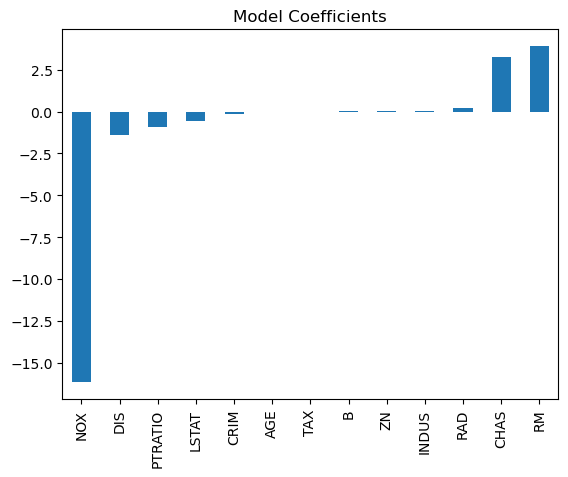

<Figure size 500x500 with 0 Axes>

In [17]:
import pandas as pd  # Import the Pandas library

# Get the column names of the training data (features)
predictors = X_train.columns

# Get the coefficients of the linear regression model and sort them
coef = pd.Series(reg.coef_, predictors).sort_values()

# Create a bar plot of the coefficients
coef.plot(kind='bar', title='Model Coefficients')
import matplotlib.pyplot as plt

# Create a smaller figure size (e.g., 6x4 inches)
plt.figure(figsize=(5, 5))

# Display the plot
plt.show()

# Ridge Regression

Hyperparameter tuning for a Ridge regression model using GridSearchCV from scikit-learn.

In [18]:
#Import Necessary Libraries:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the Ridge estimator
ridge = Ridge()

# Define the parameter grid
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 15, 18, 20]}

# Create the GridSearchCV object
ridge_regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)

# Fit the model
ridge_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 18, 20]},
             scoring='neg_mean_squared_error')

In [19]:
#To print the best hyperparameters selected by the GridSearchCV object ridge_regressor, I used the best_params_ function.

print(ridge_regressor.best_params_)

{'alpha': 0.01}


In [20]:
# To print the best score obtained during the grid search using ridge_regressor, I used the best_score_ function

print(ridge_regressor.best_score_)

-25.186899367386975


In [21]:
#calculating the predicted values for the test data

ridge_pred=ridge_regressor.predict(X_test)
ridge_pred

array([28.52859307, 36.61391924, 15.62446448, 25.49794339, 18.71651761,
       23.14663912, 17.30883131, 14.07475692, 22.99166445, 20.54553336,
       24.90263157, 18.40809393, -6.52400321, 21.82072889, 19.14851303,
       26.0555678 , 20.29340873,  5.74691746, 40.3292144 , 17.46378034,
       27.47957205, 30.21416421, 10.80664516, 23.88716488, 18.00126984,
       16.01130598, 23.25744349, 14.37364861, 22.3671398 , 19.31468367,
       22.16363415, 25.06329806, 25.13823978, 18.48393229, 16.58826798,
       17.49443878, 30.7138197 , 20.06344919, 23.98208654, 24.9392659 ,
       13.98171769, 31.64424572, 42.47600973, 17.69471466, 26.92334773,
       17.1620035 , 13.6905632 , 26.145616  , 20.26656429, 29.99670048,
       21.21064505, 34.03300557, 15.42093099, 25.95970143, 39.14516313,
       22.95869281, 18.81261673, 33.07917693, 24.74240933, 12.83096178,
       22.42715454, 30.65664806, 31.59958777, 16.35222889, 20.96015475,
       16.68403699, 20.23389533, 26.14354346, 31.12585147, 11.90

Calculating the R-squared (R2) score for the predictions made by the Ridge regression model on the test data.

In [22]:
from sklearn.metrics import r2_score
r2_score1 = r2_score(ridge_pred,y_test)
r2_score1

0.6708743257533059


# Lasso

A Lasso regression model using GridSearchCV.

In [23]:
#Import Necessary Libraries:

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the Lasso estimator
lasso = Lasso()

# Define the parameter grid
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 15, 18, 20]}

# Create the GridSearchCV object
lasso_regressor = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)

# Fit the model
lasso_regressor.fit(X_train, y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.357e+03, tolerance: 2.284e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.949e+03, tolerance: 2.493e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.581e+03, toleranc

In [24]:
print(lasso_regressor.best_params_)

{'alpha': 1e-15}


In [25]:
print(lasso_regressor.best_score_)

-25.187874739285018


In [26]:
lasso_pred=lasso_regressor.predict(X_test)
lasso_pred

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

In [27]:
from sklearn.metrics import r2_score
r2_score2 = r2_score(lasso_pred,y_test)
r2_score2

0.6709558976744425

In [28]:
print("R-Squared value for Linear Regression: ", r2_score)
print("R-Squared value for Ridge Regression: ", r2_score1)
print("R-Squared value for Lasso Regression: ", r2_score2)

R-Squared value for Linear Regression:  <function r2_score at 0x00000254B1731510>
R-Squared value for Ridge Regression:  0.6708743257533059
R-Squared value for Lasso Regression:  0.6709558976744425


In this case, all three models have similar R-squared values, indicating that they explain approximately 67% of the variance in the target variable. It's important to note that the difference in R-squared values between these models is quite small, and further analysis or considerations may be needed to determine which model is the best choice for our specific problem.